# EE 353

# Assignment 1: Exploratory and Descriptive Data Analysis

<p float="right">Pranav Prakash - 22B3945<p>

Disclosure:  
This assignment takes heavy inspiration from model submission "190020081_4.ipynb"  
The style of attribution is heavily inspired by a discussion of mine with Aaditya Gupta [22B3941]
 

## Question 1

We start off by importing all the libraries used going forward (these have been moved up into one place).

- `matplotlib` and `seaborn` are libraries used to render graphical data plots and other representations:
  - `matplotlib.pyplot`: This is a versatile plotting library used to create static, animated, and interactive visualizations in Python. It is often used for creating line plots, histograms, scatter plots, and more, giving us fine-grained control over the layout and style of the plots.
  - `seaborn`: Seaborn is built on top of `matplotlib` and provides a higher-level interface for drawing attractive and informative statistical graphics. It simplifies the creation of complex visualizations like heatmaps, violin plots, and pair plots while enhancing visual appeal with better aesthetics and themes.
  
- `numpy`: This library is used for numerical computations and is essential for handling arrays and performing operations on them efficiently. In data analysis, NumPy is particularly useful for mathematical operations, data manipulation, and working with large datasets due to its speed and functionality.
  
- `pandas`: Pandas is a powerful data manipulation library. It provides data structures like `DataFrame` and `Series` that allow for easy manipulation, filtering, grouping, and analysis of structured data. This makes it invaluable for handling tabular data, which is often used in data analysis tasks.
  
- `scipy`: SciPy is a scientific computing library that builds on NumPy. It provides more advanced mathematical functions and utilities, including optimization, integration, interpolation, eigenvalue problems, and statistical analysis. SciPy is especially useful for handling complex mathematical and statistical operations in data analysis.

- `sqlite3`: This is a built-in Python library that provides a lightweight, disk-based database. It allows for interacting with SQLite databases, which are great for small to medium-sized applications and embedded systems. In data analysis, `sqlite3` can be useful for efficiently storing and querying structured data, especially when working with small databases for testing or analysis purposes.

With these libraries, we are well-equipped to analyze, visualize, manipulate data efficiently, and work with structured datasets, whether in-memory or from a database.

*Generated via AI : [1]*


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import sqlite3

Here, we connect to the SQLite database (file)

In [2]:
sql = sqlite3.connect('assignment1.db')

We start by reading both of our CSVs into Pandas DataFrames

In [3]:
housing = pd.read_csv("LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv")
health = pd.read_csv("Restaurant_and_Market_Health_Inspections.csv")

### House-keeping: Cleaning the data
These datasets are not guaranteed to be perfect, issues like missing values and type mismatches need to be looked into before we start our analysis

#### Housing

In [4]:
display(housing.head()) # The first 5 rows of the housing data
display(housing.info()) # Includes info on the data types of each column
display(housing.nunique()) # Number of unique values in each column
print(housing.isnull().sum()[housing.isnull().any()]) # Number of missing values in each column

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,...,GSL PROPERRTY MANAGEMENT,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.26584,34.05235,POINT (-118.26584 34.05235)
1,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,"ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2024-08-05T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071)
2,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,BARKER MANAGEMENT INCORPORATED,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2024-08-05T00:00:00.000,-118.25740,34.01115,POINT (-118.2574 34.01115)
3,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,...,ABODE COMMUNITIES,(213) 225-2772,click here (http://hcidapp.lacity.org/mpphotos...,110.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-111486,2024-08-05T00:00:00.000,-118.33139,33.97355,POINT (-118.33139 33.97355)
4,5153030026,50036,WITMER HEIGHTS,In-Service,NaN,"116 S WITMER ST Los Angeles, CA 90026",13,1,TEMPLE-BEAUDRY,49,...,THE JOHN STEWART COMPANY,(213) 482-9122,click here (http://hcidapp.lacity.org/mpphotos...,95.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-109452,2024-08-05T00:00:00.000,-118.26086,34.06173,POINT (-118.26086 34.06173)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APN                      595 non-null    int64  
 1   PROJECT NUMBER           595 non-null    object 
 2   NAME                     595 non-null    object 
 3   DEVELOPMENT STAGE        594 non-null    object 
 4   CONSTRUCTION TYPE        561 non-null    object 
 5   SITE ADDRESS             595 non-null    object 
 6   SITE  COUNCIL DISTRICT   595 non-null    int64  
 7   SITE #                   595 non-null    int64  
 8   SITE COMMUNITY           588 non-null    object 
 9   SITE UNITS               595 non-null    int64  
 10  PROJECT TOTAL UNITS      595 non-null    int64  
 11  HOUSING TYPE             573 non-null    object 
 12  SUPPORTIVE HOUSING       595 non-null    object 
 13  SH UNITS PER SITE        595 non-null    int64  
 14  DATE FUNDED              5

None

APN                        584
PROJECT NUMBER             447
NAME                       595
DEVELOPMENT STAGE            2
CONSTRUCTION TYPE            7
SITE ADDRESS               591
SITE  COUNCIL DISTRICT      15
SITE #                      20
SITE COMMUNITY              87
SITE UNITS                 144
PROJECT TOTAL UNITS        132
HOUSING TYPE                 6
SUPPORTIVE HOUSING           2
SH UNITS PER SITE           91
DATE FUNDED                382
LAHD FUNDED                350
LEVERAGE                   396
TAX EXEMPT CONDUIT BOND    126
TDC                        440
IN-SERVICE DATE             26
DEVELOPER                  226
MANAGEMENT COMPANY         146
CONTACT PHONE              182
PHOTO                      312
JOBS                       242
PROJECT SUMMARY URL        595
CONTRACT NUMBERS           378
DATE STAMP                   1
SITE LONGITUDE             549
SITE LATITUDE              565
GPS_COORDS ON MAP          582
dtype: int64

DEVELOPMENT STAGE       1
CONSTRUCTION TYPE      34
SITE COMMUNITY          7
HOUSING TYPE           22
DATE FUNDED             1
DEVELOPER              26
MANAGEMENT COMPANY     55
CONTACT PHONE          84
JOBS                  180
CONTRACT NUMBERS      148
dtype: int64


- Of the columns with `NULL` values, a few seem to have mostly unique data, so we shall go ahead and drop them
- `DATE STAMP` has no variation, so we also drop it
- Assume rows with empty `JOBS` columns have 0 jobs
- Once this is done, we drop all rows that still have some `NULL/NaN` values to get completely filled rows

In [5]:
housing_cleaned = housing.drop(columns=['DATE STAMP','CONTRACT NUMBERS', 'CONTACT PHONE','DATE FUNDED','MANAGEMENT COMPANY'])
housing_cleaned['JOBS'] = housing_cleaned['JOBS'].fillna(0)

# Drop rows with missing values, and reset the index
housing_cleaned = housing_cleaned.dropna()
housing_cleaned = housing_cleaned.reset_index(drop=True)

# Get the length of the cleaned data
print(len(housing_cleaned))

534


Confirming the successful cleaning:

In [6]:
display(housing_cleaned.info()) # Includes info on the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APN                      534 non-null    int64  
 1   PROJECT NUMBER           534 non-null    object 
 2   NAME                     534 non-null    object 
 3   DEVELOPMENT STAGE        534 non-null    object 
 4   CONSTRUCTION TYPE        534 non-null    object 
 5   SITE ADDRESS             534 non-null    object 
 6   SITE  COUNCIL DISTRICT   534 non-null    int64  
 7   SITE #                   534 non-null    int64  
 8   SITE COMMUNITY           534 non-null    object 
 9   SITE UNITS               534 non-null    int64  
 10  PROJECT TOTAL UNITS      534 non-null    int64  
 11  HOUSING TYPE             534 non-null    object 
 12  SUPPORTIVE HOUSING       534 non-null    object 
 13  SH UNITS PER SITE        534 non-null    int64  
 14  LAHD FUNDED              5

None

`IN-SERVICE DATE` is a year, or the value Development. Let us consider Development to be equal to 2025 in our case

In [7]:
display(housing_cleaned['IN-SERVICE DATE'].head())
housing_cleaned['IN-SERVICE DATE'] = pd.to_numeric(housing_cleaned['IN-SERVICE DATE'], errors='coerce')
housing_cleaned['IN-SERVICE DATE'] = housing_cleaned['IN-SERVICE DATE'].fillna(2025)
housing_cleaned['IN-SERVICE DATE'].head()

0    2006
1    2021
2    2009
3    2024
4    2018
Name: IN-SERVICE DATE, dtype: object

0    2006.0
1    2021.0
2    2009.0
3    2024.0
4    2018.0
Name: IN-SERVICE DATE, dtype: float64

Lastly, let us identify rows that are categories and convert them accordingly. Assume rows with less that 20 unique values are good options for categories *[6]*

In [8]:
# Get column names with nunique() < 20 programmatically
category_columns = housing_cleaned.nunique()[housing_cleaned.nunique() < 20]
display(category_columns)

# Convert these columns to category type
for col in category_columns.index:
    housing_cleaned[col] = housing_cleaned[col].astype('category')

display(housing_cleaned[category_columns.index].head())

DEVELOPMENT STAGE          2
CONSTRUCTION TYPE          7
SITE  COUNCIL DISTRICT    15
HOUSING TYPE               6
SUPPORTIVE HOUSING         2
dtype: int64

,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE COUNCIL DISTRICT,HOUSING TYPE,SUPPORTIVE HOUSING
0,In-Service,REHAB,10,FAMILY,No
1,In-Service,NEW CONSTRUCTION,9,SPECIAL NEEDS,Yes
2,In-Service,NEW CONSTRUCTION,8,SENIORS,No
3,In-Service,NEW CONSTRUCTION,9,FAMILY,No
4,In-Service,NEW CONSTRUCTION,8,SPECIAL NEEDS,Yes


In [9]:
display(housing_cleaned.info()) # Includes info on the data types of each column
display(housing_cleaned.head()) # The first 5 rows of the housing data
display(housing_cleaned.describe()) # Summary statistics for the housing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   APN                      534 non-null    int64   
 1   PROJECT NUMBER           534 non-null    object  
 2   NAME                     534 non-null    object  
 3   DEVELOPMENT STAGE        534 non-null    category
 4   CONSTRUCTION TYPE        534 non-null    category
 5   SITE ADDRESS             534 non-null    object  
 6   SITE  COUNCIL DISTRICT   534 non-null    category
 7   SITE #                   534 non-null    int64   
 8   SITE COMMUNITY           534 non-null    object  
 9   SITE UNITS               534 non-null    int64   
 10  PROJECT TOTAL UNITS      534 non-null    int64   
 11  HOUSING TYPE             534 non-null    category
 12  SUPPORTIVE HOUSING       534 non-null    category
 13  SH UNITS PER SITE        534 non-null    int64   
 14  LAHD FUNDE

None

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,...,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,DEVELOPER,PHOTO,JOBS,PROJECT SUMMARY URL,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,...,10208936,17312930.00,2006.0,"HAMPSTEAD PARTNERS, INC.",click here (http://hcidapp.lacity.org/mpphotos...,0.0,click here (http://hcidapp.lacity.org/ahtfRepo...,-118.34182,34.03071,POINT (-118.34182 34.03071)
1,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,...,0,45471107.63,2021.0,Hollywood Community Housing Corporation,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,-118.25740,34.01115,POINT (-118.2574 34.01115)
2,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,...,0,13709884.00,2009.0,Abode Communities previously known as LA COMMU...,click here (http://hcidapp.lacity.org/mpphotos...,110.0,click here (http://hcidapp.lacity.org/ahtfRepo...,-118.33139,33.97355,POINT (-118.33139 33.97355)
3,5127029049,18-125459,LA PRENSA LIBRE- 9% (FKA WASHINGTON/ LA),In-Service,NEW CONSTRUCTION,"200 E WASHINGTON BLVD Los Angeles, CA 90015",9,1,UNIVERSITY PARK,42,...,0,31270325.00,2024.0,Coalition for Responsible Community Developmen...,click here (http://hcidapp.lacity.org/mpphotos...,0.0,click here (http://hcidapp.lacity.org/ahtfRepo...,-118.26348,34.03031,POINT (-118.26348 34.03031)
4,5037025018,14-121612,KING 1101,In-Service,NEW CONSTRUCTION,"1107 W MARTIN LUTHER KING BLVD Los Angeles, C...",8,1,EXPOSITION PARK,26,...,0,16433276.00,2018.0,"Clifford Beers Housing, Inc.",click here (http://hcidapp.lacity.org/mpphotos...,85.0,click here (http://hcidapp.lacity.org/ahtfRepo...,-118.29437,34.01106,POINT (-118.29437 34.01106)


,APN,SITE #,SITE UNITS,PROJECT TOTAL UNITS,SH UNITS PER SITE,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,JOBS,SITE LONGITUDE,SITE LATITUDE
count,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,534.000000,534.000000,534.000000,534.000000
mean,4.934305e+09,2.110487,56.136704,93.129213,20.919476,4.526183e+06,1.656479e+07,3.068062e+06,2.415903e+07,2014.601124,138.260300,-118.308025,34.055466
std,1.156469e+09,2.878555,50.231752,67.822914,32.891987,5.166133e+06,1.322016e+07,1.008728e+07,1.775479e+07,6.766827,151.568391,0.077912,0.093504
min,2.103009e+09,1.000000,0.000000,6.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1998.000000,0.000000,-118.606390,33.736140
25%,5.050004e+09,1.000000,21.000000,49.000000,0.000000,0.000000e+00,7.334438e+06,0.000000e+00,1.354238e+07,2008.000000,0.000000,-118.319910,34.013150
50%,5.143017e+09,1.000000,49.000000,73.000000,0.000000,3.225000e+06,1.369985e+07,0.000000e+00,2.026782e+07,2014.000000,99.000000,-118.285880,34.047710
75%,5.503773e+09,1.000000,77.000000,105.500000,39.000000,6.617500e+06,2.264349e+07,4.437750e+06,2.995440e+07,2021.000000,227.500000,-118.263285,34.089375
max,7.455014e+09,20.000000,438.000000,438.000000,262.000000,3.968821e+07,9.407772e+07,1.842604e+08,2.230181e+08,2025.000000,1165.000000,-118.165140,34.324020


#### Health

In [10]:
display(health.head()) # The first 5 rows of the housing data
display(health.info()) # Includes info on the data types of each column
display(health.nunique()) # Number of unique values in each column
print(health.isnull().sum()[health.isnull().any()]) # Number of missing values in each column

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAJ00E07B,12/29/2017 12:00:00 AM,HABITAT COFFEE SHOP,95,A,1,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,FA0170465,CA,90065,OW0178123,GLASSELL COFFEE SHOP LLC,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE,PR0160774
1,DAQOKRFZB,12/29/2017 12:00:00 AM,REILLY'S,92,A,1,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,FA0244690,CA,90045,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE,PR0193026
2,DASJI4LUR,12/29/2017 12:00:00 AM,STREET CHURROS,93,A,1,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,FA0224109,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE,PR0179282
3,DA40LU5AT,12/29/2017 12:00:00 AM,TRINITI ECHO PARK,94,A,1,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,FA0252528,CA,90026-3227,OW0246287,AMERICAN HOSPITALITY,RESTAURANT (0-30) SEATS MODERATE RISK,1631,TRINITI ECHO PARK,ACTIVE,PR0201836
4,DAXV2RMYC,12/29/2017 12:00:00 AM,POLLEN,94,A,1,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,FA0252789,CA,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLEN,ACTIVE,PR0202148


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67573 entries, 0 to 67572
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   serial_number        67573 non-null  object
 1   activity_date        67573 non-null  object
 2   facility_name        67573 non-null  object
 3   score                67573 non-null  int64 
 4   grade                67570 non-null  object
 5   service_code         67573 non-null  int64 
 6   service_description  67573 non-null  object
 7   employee_id          67573 non-null  object
 8   facility_address     67573 non-null  object
 9   facility_city        67573 non-null  object
 10  facility_id          67573 non-null  object
 11  facility_state       67573 non-null  object
 12  facility_zip         67573 non-null  object
 13  owner_id             67573 non-null  object
 14  owner_name           67573 non-null  object
 15  pe_description       67573 non-null  object
 16  prog

None

serial_number          67573
activity_date            860
facility_name          12071
score                     36
grade                      4
service_code               2
service_description        2
employee_id              143
facility_address       11782
facility_city              1
facility_id            13545
facility_state             1
facility_zip            1053
owner_id               11786
owner_name             11566
pe_description            30
program_element_pe        18
program_name           12928
program_status             2
record_id              14558
dtype: int64

grade            3
program_name    29
dtype: int64


- Very few rows have `NULL` values so we go ahead and drop them
- Also drop columns with no variations
- This CSV includes `FOOD MARKET`s and other establishments also, we need to filter those values out

In [11]:
single_unique_columns = health.nunique()[health.nunique() == 1]
health_cleaned = health.drop(columns=single_unique_columns.index)

health_cleaned = health_cleaned[health_cleaned["pe_description"].str.startswith("RESTAURANT")]

# Drop rows with missing values, and reset the index
health_cleaned = health_cleaned.dropna()
health_cleaned = health_cleaned.reset_index(drop=True)

# Get the length of the cleaned data
print(len(health_cleaned))

54043


Lastly, let us identify rows that are categories and convert them to the according data types. Once again, assume rows with less that 20 unique values are good options for categories *[6]*

In [12]:
# Get column names with nunique() < 20 programmatically
category_columns = health_cleaned.nunique()[health_cleaned.nunique() < 20]
display(category_columns)

# Convert these columns to category type
for col in category_columns.index:
    health_cleaned[col] = health_cleaned[col].astype('category')

display(health_cleaned[category_columns.index].head())

grade                   4
service_code            2
service_description     2
pe_description         12
program_element_pe     15
program_status          2
dtype: int64

,grade,service_code,service_description,pe_description,program_element_pe,program_status
0,A,1,ROUTINE INSPECTION,RESTAURANT (0-30) SEATS MODERATE RISK,1631,ACTIVE
1,A,1,ROUTINE INSPECTION,RESTAURANT (0-30) SEATS MODERATE RISK,1631,ACTIVE
2,A,1,ROUTINE INSPECTION,RESTAURANT (0-30) SEATS LOW RISK,1630,ACTIVE
3,A,1,ROUTINE INSPECTION,RESTAURANT (0-30) SEATS MODERATE RISK,1631,ACTIVE
4,A,1,ROUTINE INSPECTION,RESTAURANT (0-30) SEATS MODERATE RISK,1631,ACTIVE


In [13]:
display(health_cleaned.info()) # Includes info on the data types of each column
display(health_cleaned.head()) # The first 5 rows of the housing data
display(health_cleaned.describe()) # Summary statistics for the housing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54043 entries, 0 to 54042
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   serial_number        54043 non-null  object  
 1   activity_date        54043 non-null  object  
 2   facility_name        54043 non-null  object  
 3   score                54043 non-null  int64   
 4   grade                54043 non-null  category
 5   service_code         54043 non-null  category
 6   service_description  54043 non-null  category
 7   employee_id          54043 non-null  object  
 8   facility_address     54043 non-null  object  
 9   facility_id          54043 non-null  object  
 10  facility_zip         54043 non-null  object  
 11  owner_id             54043 non-null  object  
 12  owner_name           54043 non-null  object  
 13  pe_description       54043 non-null  category
 14  program_element_pe   54043 non-null  category
 15  program_name       

None

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_id,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAJ00E07B,12/29/2017 12:00:00 AM,HABITAT COFFEE SHOP,95,A,1,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,FA0170465,90065,OW0178123,GLASSELL COFFEE SHOP LLC,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE,PR0160774
1,DAQOKRFZB,12/29/2017 12:00:00 AM,REILLY'S,92,A,1,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,FA0244690,90045,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE,PR0193026
2,DASJI4LUR,12/29/2017 12:00:00 AM,STREET CHURROS,93,A,1,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,FA0224109,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE,PR0179282
3,DA40LU5AT,12/29/2017 12:00:00 AM,TRINITI ECHO PARK,94,A,1,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,FA0252528,90026-3227,OW0246287,AMERICAN HOSPITALITY,RESTAURANT (0-30) SEATS MODERATE RISK,1631,TRINITI ECHO PARK,ACTIVE,PR0201836
4,DAXV2RMYC,12/29/2017 12:00:00 AM,POLLEN,94,A,1,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,FA0252789,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLEN,ACTIVE,PR0202148


,score
count,54043.000000
mean,93.067557
std,3.977427
min,64.000000
25%,91.000000
50%,93.000000
75%,96.000000
max,100.000000


**EDA Starts Now!!**

### ZIP and Preliminary Graphs

Let us begin by extracting the `ZIP` code from both dataframes.

- Zip lives in the last 5 characters of the `SITE ADDRESS` column of the housing data
- Zip lives in the first 5 characters of the `facility_zip` column of the health data

In [14]:
housing_cleaned['ZIP'] = housing_cleaned['SITE ADDRESS'].str[-5:]
housing_cleaned['ZIP'] = pd.to_numeric(housing_cleaned['ZIP'], errors='coerce').fillna(0).astype(int)
display(housing_cleaned['ZIP'].describe())

health_cleaned['ZIP'] = health_cleaned['facility_zip'].str[:5]
health_cleaned['ZIP'] = pd.to_numeric(health_cleaned['ZIP'], errors='coerce').fillna(0).astype(int)
display(health_cleaned['ZIP'].describe())

count      534.000000
mean     90245.720974
std        483.714830
min      90002.000000
25%      90013.000000
50%      90028.000000
75%      90058.500000
max      91606.000000
Name: ZIP, dtype: float64

count    54043.000000
mean     90032.414966
std         62.358726
min      90001.000000
25%      90015.000000
50%      90027.000000
75%      90042.000000
max      92880.000000
Name: ZIP, dtype: float64

For starters, let us plot all values that are integers, floats on histograms and categories on pie charts _[3,5,7]_

#### Housing

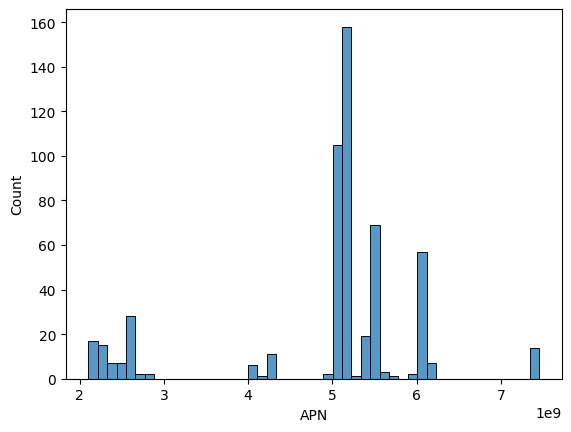

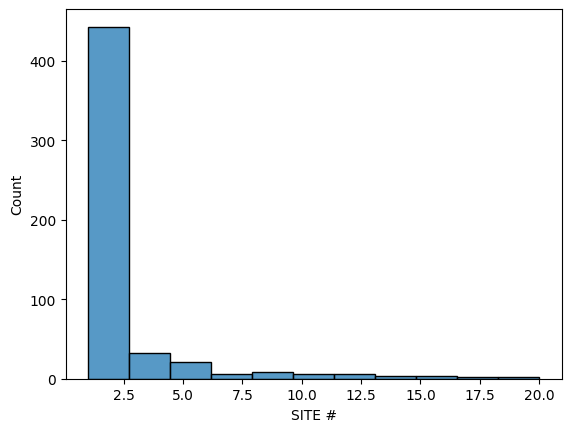

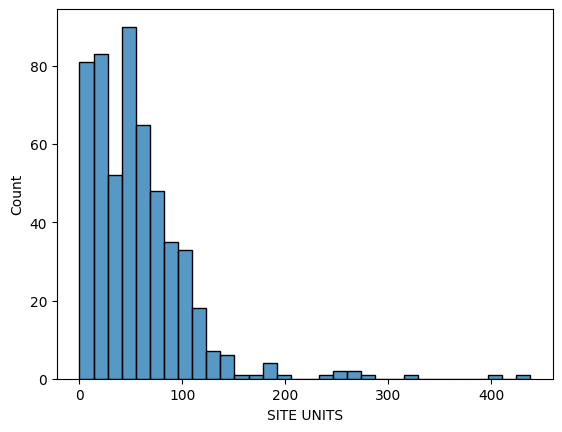

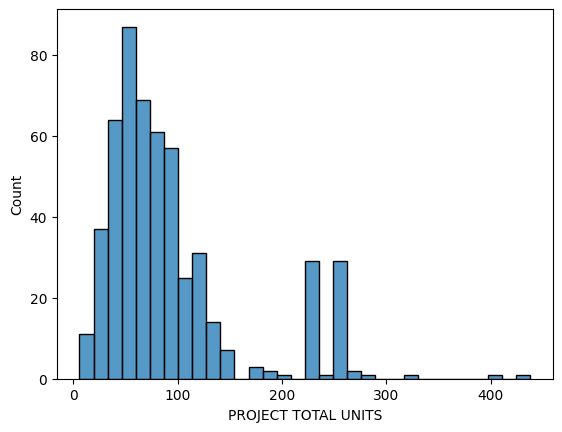

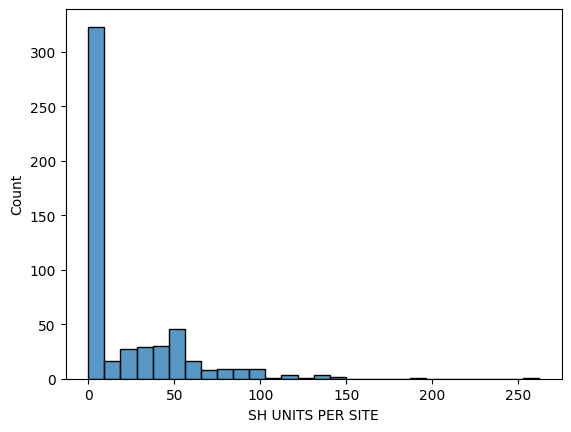

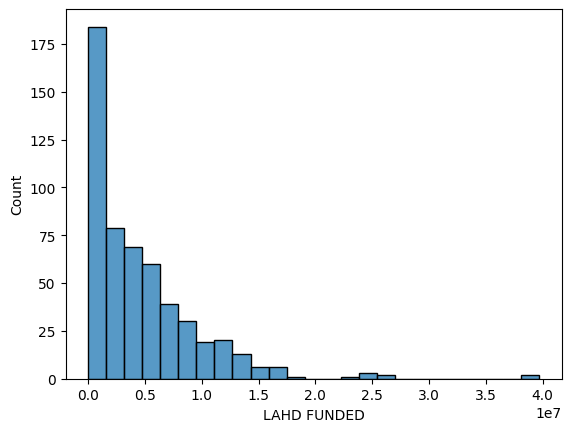

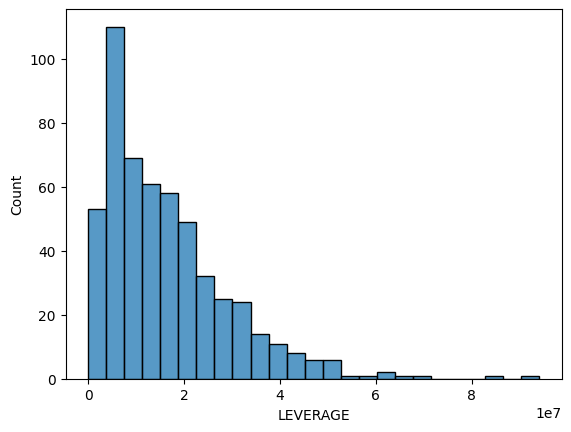

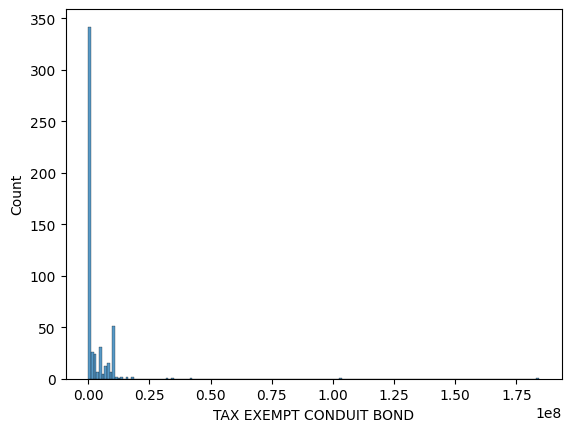

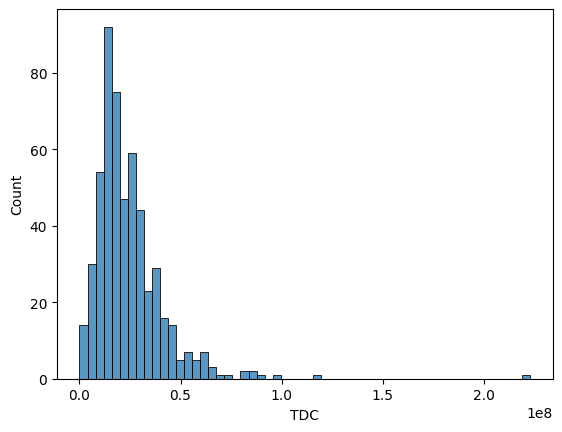

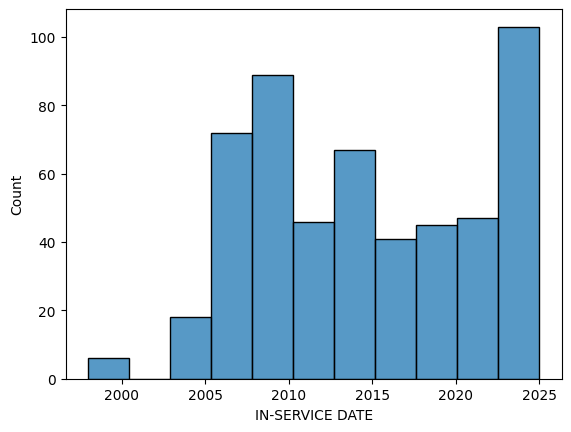

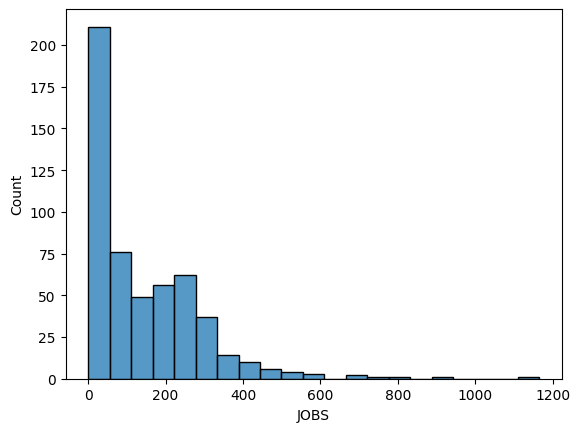

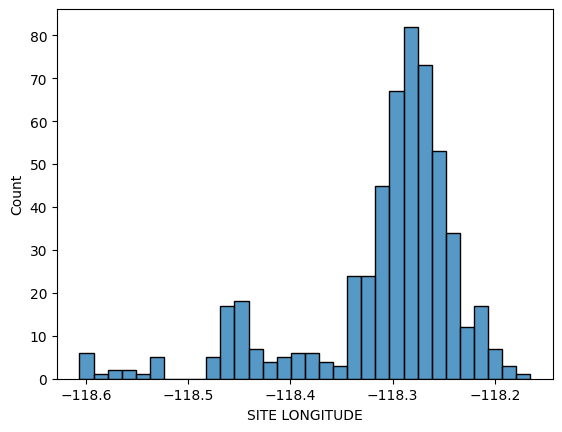

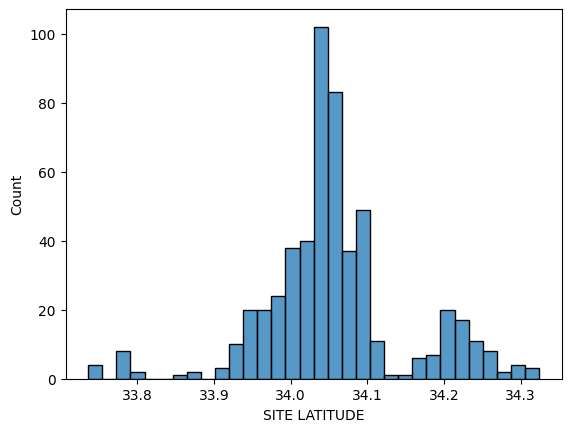

In [15]:
# Filter out relevant columns
numeric_columns = housing_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric columns
for col in numeric_columns:
    sns.histplot(housing_cleaned[col])
    plt.xlabel(col)
    plt.show()

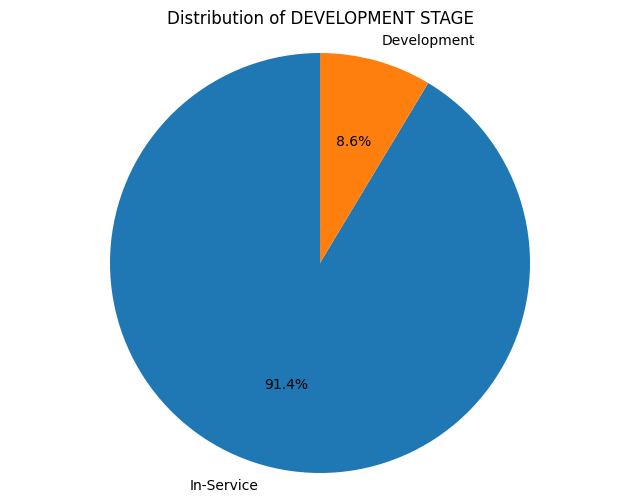

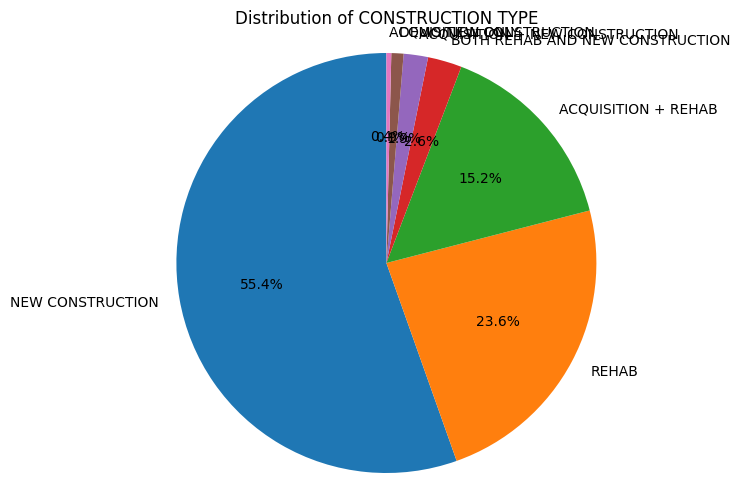

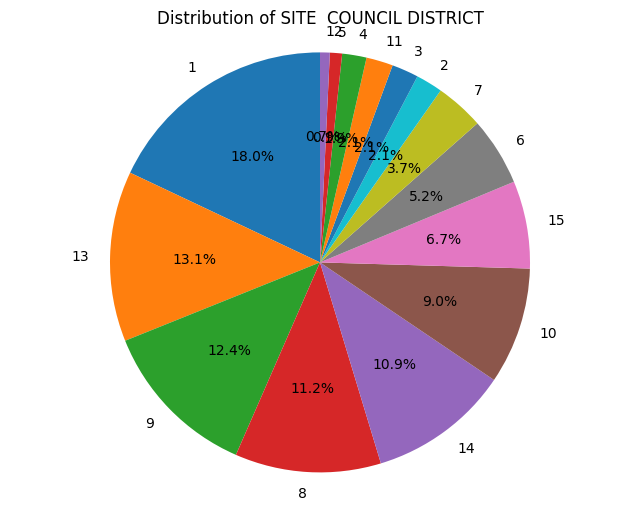

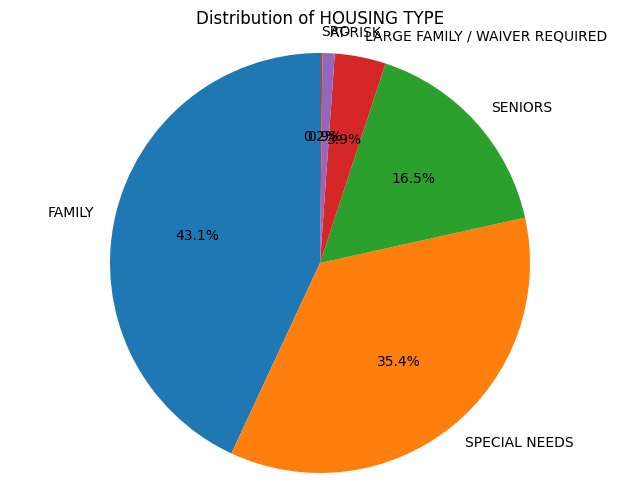

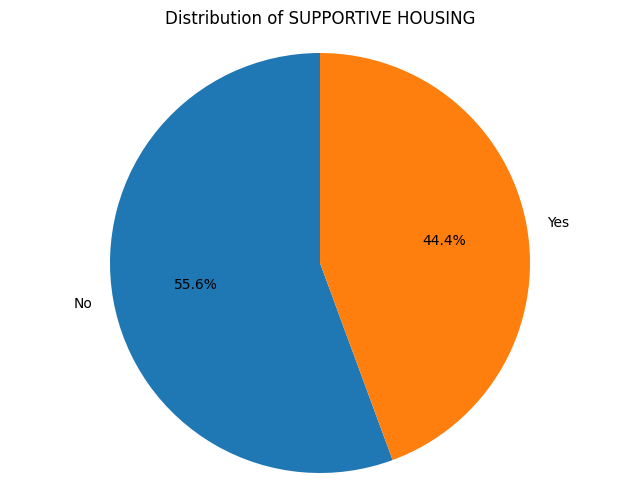

In [16]:
# Filter out relevant columns
category_columns = housing_cleaned.select_dtypes(include=['category']).columns

# Plot pie charts for categorical columns
for col in category_columns:
    # Get value counts for the categorical column
    value_counts = housing_cleaned[col].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()


#### Health

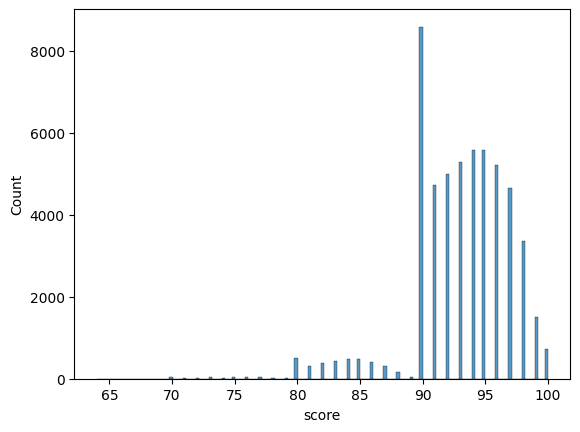

In [17]:
# Filter out relevant columns
numeric_columns = health_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numeric columns
for col in numeric_columns:
    sns.histplot(health_cleaned[col])
    plt.xlabel(col)
    plt.show()

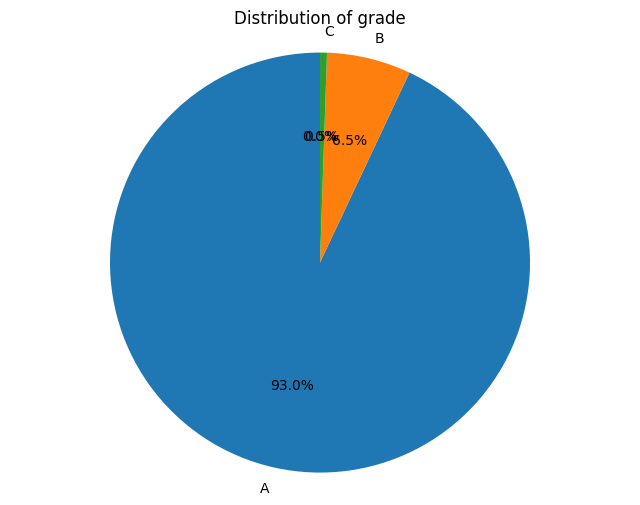

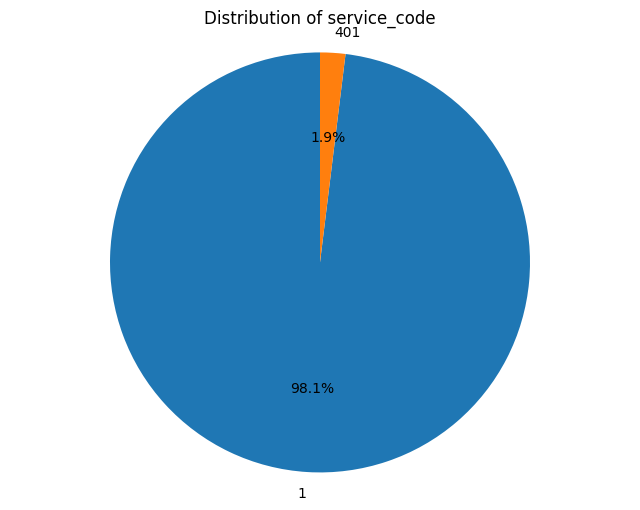

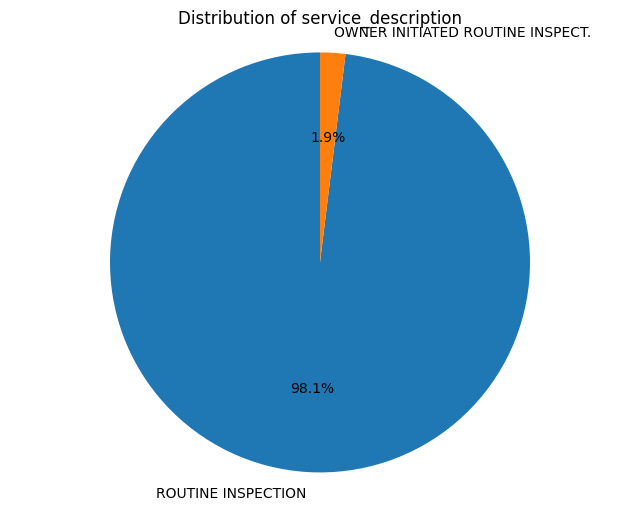

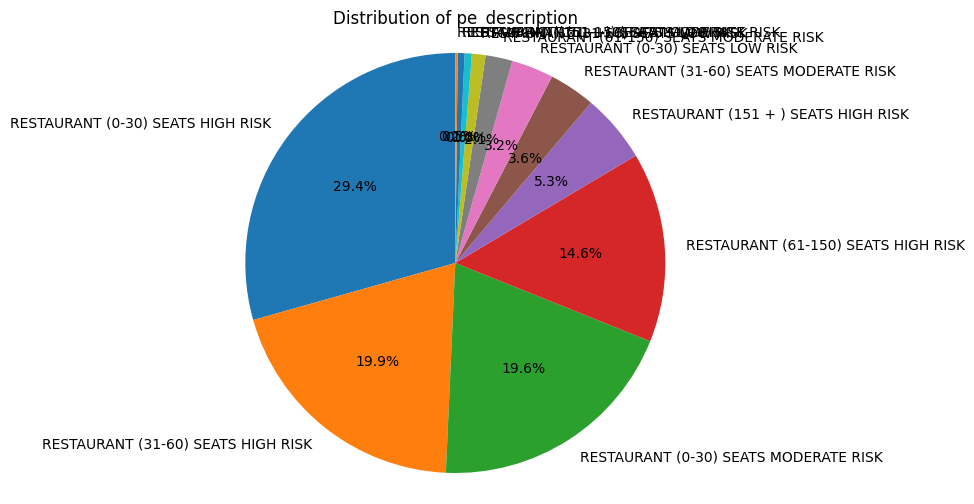

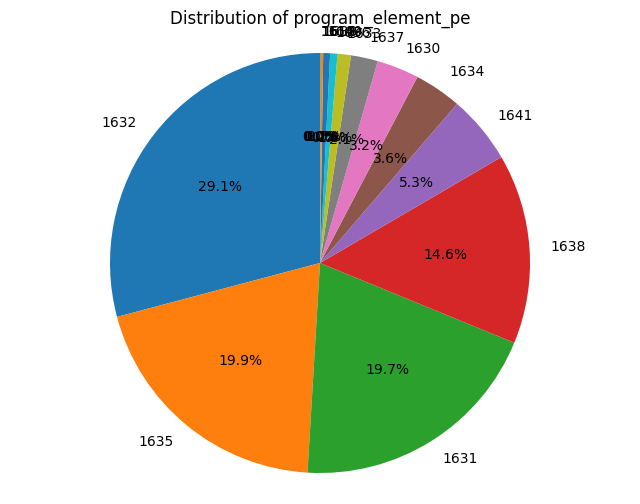

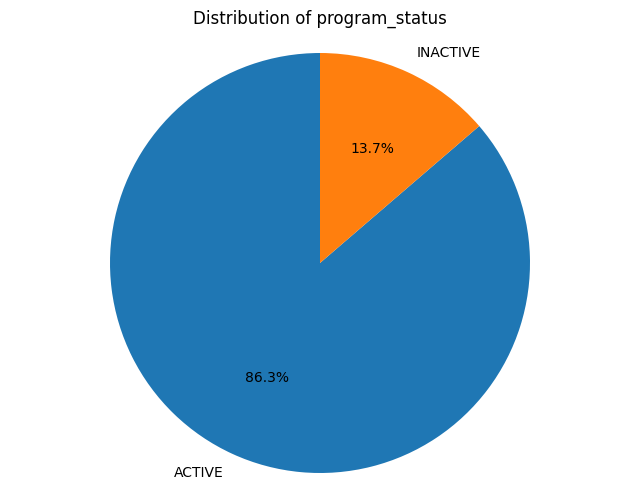

In [18]:
# Filter out relevant columns
category_columns = health_cleaned.select_dtypes(include=['category']).columns

# Plot pie charts for categorical columns
for col in category_columns:
    # Get value counts for the categorical column
    value_counts = health_cleaned[col].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
    plt.show()


### SQL and Aggregation
Let us use `df.to_sql()` function, to create and populate the tables

In [19]:
# SITE # seems to be causing an error, so we rename it to SITE NUMBER
housing_cleaned = housing_cleaned.rename(columns={'SITE #': 'SITE NUMBER'})

housing_cleaned.to_sql("housing", sql, if_exists="replace", index=False)
health_cleaned.to_sql("health", sql, if_exists="replace", index=False) 

54043

Now let us aggregate all numerical value data in housing and health, group by `ZIP` and join the results

In [20]:
# Get integer and float columns of both tables
housing_numeric_columns = housing_cleaned.select_dtypes(include=['int64', 'float64']).columns
health_numeric_columns = health_cleaned.select_dtypes(include=['int64', 'float64']).columns

print(housing_numeric_columns)
print(health_numeric_columns)

Index(['APN', 'SITE NUMBER', 'SITE UNITS', 'PROJECT TOTAL UNITS',
       'SH UNITS PER SITE', 'LAHD FUNDED', 'LEVERAGE',
       'TAX EXEMPT CONDUIT BOND', 'TDC', 'IN-SERVICE DATE', 'JOBS',
       'SITE LONGITUDE', 'SITE LATITUDE'],
      dtype='object')
Index(['score'], dtype='object')


To make life easier, we will instead go for the Pandas approach for aggregation. *[8]*

In [21]:
# Perform aggregation on housing_cleaned grouped by ZIP
housing_agg = housing_cleaned.groupby('ZIP').agg({
    'APN': ['sum', 'mean', 'max'],
    'SITE NUMBER': ['sum', 'mean', 'max'],
    'SITE UNITS': ['sum', 'mean', 'max'],
    'PROJECT TOTAL UNITS': ['sum', 'mean', 'max'],
    'SH UNITS PER SITE': ['sum', 'mean', 'max'],
    'LAHD FUNDED': ['sum', 'mean', 'max'],
    'LEVERAGE': ['sum', 'mean', 'max'],
    'TAX EXEMPT CONDUIT BOND': ['sum', 'mean', 'max'],
    'TDC': ['sum', 'mean', 'max'],
    'IN-SERVICE DATE': ['mean', 'max'],  # Dates: Only meaningful stats are mean and max
    'JOBS': ['sum', 'mean', 'max'],
    'SITE LONGITUDE': ['mean'],  # Avg long/lat might be most meaningful
    'SITE LATITUDE': ['mean']
}).reset_index()
housing_agg.columns = ['ZIP'] + ['_'.join(col).strip() for col in housing_agg.columns.values[1:]]
housing_agg

,ZIP,APN_sum,APN_mean,APN_max,SITE NUMBER_sum,SITE NUMBER_mean,SITE NUMBER_max,SITE UNITS_sum,SITE UNITS_mean,SITE UNITS_max,...,TDC_sum,TDC_mean,TDC_max,IN-SERVICE DATE_mean,IN-SERVICE DATE_max,JOBS_sum,JOBS_mean,JOBS_max,SITE LONGITUDE_mean,SITE LATITUDE_mean
0,90002,78708191945,6.054476e+09,6066019011,69,5.307692,15,564,43.384615,135,...,3.920134e+08,3.015488e+07,69759157.0,2013.230769,2025.0,1568.0,120.615385,775.0,-118.246342,33.944055
1,90003,114480200271,6.025274e+09,6053022021,116,6.105263,19,691,36.368421,257,...,5.109202e+08,2.689054e+07,83642238.0,2015.368421,2025.0,2358.0,124.105263,301.0,-118.273930,33.968679
2,90004,71603126632,5.507933e+09,5521006019,16,1.230769,2,679,52.230769,122,...,3.467103e+08,2.667002e+07,56064860.0,2017.461538,2025.0,2422.0,186.307692,368.0,-118.291352,34.076420
3,90005,20733095063,5.183274e+09,5502031011,7,1.750000,4,433,108.250000,283,...,1.427592e+08,3.568981e+07,52443992.0,2015.500000,2025.0,555.0,138.750000,292.0,-118.290008,34.059030
4,90006,116949373314,5.084755e+09,5136020025,49,2.130435,9,1035,45.000000,111,...,4.719015e+08,2.051746e+07,47077567.0,2014.260870,2025.0,2409.0,104.739130,355.0,-118.293279,34.049593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,91406,4860072115,2.430036e+09,2654037081,2,1.000000,1,140,70.000000,94,...,5.151909e+07,2.575954e+07,30031946.0,2017.500000,2025.0,274.0,137.000000,274.0,-118.474755,34.209635
73,91411,2249001004,2.249001e+09,2249001004,1,1.000000,1,55,55.000000,55,...,3.091952e+07,3.091952e+07,30919525.0,2023.000000,2023.0,250.0,250.000000,250.0,-118.450170,34.171880
74,91601,7124030101,2.374677e+09,2421011046,3,1.000000,1,171,57.000000,82,...,6.140392e+07,2.046797e+07,24120894.0,2016.333333,2024.0,472.0,157.333333,168.0,-118.374260,34.164157
75,91605,9274066076,2.318517e+09,2327017034,4,1.000000,1,282,70.500000,100,...,1.036572e+08,2.591431e+07,41028473.0,2017.250000,2025.0,308.0,77.000000,162.0,-118.394935,34.203720


In [22]:
# Perform aggregation on health_cleaned grouped by ZIP
health_agg = health_cleaned.groupby('ZIP').agg({
    'score': ['sum', 'mean', 'max']
}).reset_index()
health_agg.columns = ['ZIP'] + ['_'.join(col).strip() for col in health_agg.columns.values[1:]]
health_agg

,ZIP,score_sum,score_mean,score_max
0,90001,66457,93.469761,100
1,90002,11022,94.205128,100
2,90003,58128,92.120444,100
3,90004,107597,92.836066,100
4,90005,125881,90.888809,100
...,...,...,...,...
88,91401,191,95.500000,96
89,91505,389,97.250000,100
90,91602,287,95.666667,97
91,91604,2535,93.888889,98


Finally, we join both the aggregated dataframes

In [23]:
final_df = pd.merge(housing_agg, health_agg, on='ZIP', how='inner')
final_df

,ZIP,APN_sum,APN_mean,APN_max,SITE NUMBER_sum,SITE NUMBER_mean,SITE NUMBER_max,SITE UNITS_sum,SITE UNITS_mean,SITE UNITS_max,...,IN-SERVICE DATE_mean,IN-SERVICE DATE_max,JOBS_sum,JOBS_mean,JOBS_max,SITE LONGITUDE_mean,SITE LATITUDE_mean,score_sum,score_mean,score_max
0,90002,78708191945,6.054476e+09,6066019011,69,5.307692,15,564,43.384615,135,...,2013.230769,2025.0,1568.0,120.615385,775.0,-118.246342,33.944055,11022,94.205128,100
1,90003,114480200271,6.025274e+09,6053022021,116,6.105263,19,691,36.368421,257,...,2015.368421,2025.0,2358.0,124.105263,301.0,-118.273930,33.968679,58128,92.120444,100
2,90004,71603126632,5.507933e+09,5521006019,16,1.230769,2,679,52.230769,122,...,2017.461538,2025.0,2422.0,186.307692,368.0,-118.291352,34.076420,107597,92.836066,100
3,90005,20733095063,5.183274e+09,5502031011,7,1.750000,4,433,108.250000,283,...,2015.500000,2025.0,555.0,138.750000,292.0,-118.290008,34.059030,125881,90.888809,100
4,90006,116949373314,5.084755e+09,5136020025,49,2.130435,9,1035,45.000000,111,...,2014.260870,2025.0,2409.0,104.739130,355.0,-118.293279,34.049593,152026,92.304797,100
5,90007,86711350040,5.100668e+09,5124031013,55,3.235294,10,404,23.764706,96,...,2011.941176,2021.0,408.0,24.000000,149.0,-118.284346,34.032467,95713,94.671612,100
6,90008,10064009812,5.032005e+09,5032004909,2,1.000000,1,172,86.000000,103,...,2016.000000,2020.0,228.0,114.000000,228.0,-118.342215,34.013565,37298,93.949622,100
7,90011,143307422335,5.118122e+09,5131026028,94,3.357143,14,1007,35.964286,118,...,2014.321429,2025.0,4006.0,143.071429,285.0,-118.256552,34.013425,71262,93.152941,100
8,90012,47422144503,5.269127e+09,5414013900,9,1.000000,1,1572,174.666667,438,...,2016.666667,2025.0,3568.0,396.444444,1165.0,-118.240847,34.056673,235363,93.176168,100
9,90013,66920201218,5.147708e+09,5149037010,13,1.000000,1,1464,112.615385,264,...,2016.000000,2025.0,3587.0,275.923077,703.0,-118.244919,34.044372,91334,94.353306,100


In case we wanted to do it only using SQL, we could just use this query *[9]*

In [24]:
EQUIVALENT_SQL = """
WITH housing_agg AS (
    SELECT 
        ZIP,
        SUM(APN) AS sum_apn,
        AVG(APN) AS mean_apn,
        MAX(APN) AS max_apn,
        SUM([SITE NUMBER]) AS sum_site_number,
        AVG([SITE NUMBER]) AS mean_site_number,
        MAX([SITE NUMBER]) AS max_site_number,
        SUM([SITE UNITS]) AS sum_site_units,
        AVG([SITE UNITS]) AS mean_site_units,
        MAX([SITE UNITS]) AS max_site_units,
        SUM([PROJECT TOTAL UNITS]) AS sum_project_total_units,
        AVG([PROJECT TOTAL UNITS]) AS mean_project_total_units,
        MAX([PROJECT TOTAL UNITS]) AS max_project_total_units,
        SUM([SH UNITS PER SITE]) AS sum_sh_units_per_site,
        AVG([SH UNITS PER SITE]) AS mean_sh_units_per_site,
        MAX([SH UNITS PER SITE]) AS max_sh_units_per_site,
        SUM([LAHD FUNDED]) AS sum_lahd_funded,
        AVG([LAHD FUNDED]) AS mean_lahd_funded,
        MAX([LAHD FUNDED]) AS max_lahd_funded,
        SUM([LEVERAGE]) AS sum_leverage,
        AVG([LEVERAGE]) AS mean_leverage,
        MAX([LEVERAGE]) AS max_leverage,
        SUM([TAX EXEMPT CONDUIT BOND]) AS sum_tax_exempt_conduit_bond,
        AVG([TAX EXEMPT CONDUIT BOND]) AS mean_tax_exempt_conduit_bond,
        MAX([TAX EXEMPT CONDUIT BOND]) AS max_tax_exempt_conduit_bond,
        SUM([TDC]) AS sum_tdc,
        AVG([TDC]) AS mean_tdc,
        MAX([TDC]) AS max_tdc,
        AVG([IN-SERVICE DATE]) AS mean_in_service_date,
        MAX([IN-SERVICE DATE]) AS max_in_service_date,
        SUM([JOBS]) AS sum_jobs,
        AVG([JOBS]) AS mean_jobs,
        MAX([JOBS]) AS max_jobs,
        AVG([SITE LONGITUDE]) AS mean_site_longitude,
        AVG([SITE LATITUDE]) AS mean_site_latitude
    FROM housing
    GROUP BY ZIP
),

health_agg AS (
    SELECT 
        ZIP,
        SUM(score) AS sum_score,
        AVG(score) AS mean_score,
        MAX(score) AS max_score
    FROM health
    GROUP BY ZIP
)

SELECT 
    hagg.ZIP,
    hagg.sum_apn,
    hagg.mean_apn,
    hagg.max_apn,
    hagg.sum_site_number,
    hagg.mean_site_number,
    hagg.max_site_number,
    hagg.sum_site_units,
    hagg.mean_site_units,
    hagg.max_site_units,
    hagg.sum_project_total_units,
    hagg.mean_project_total_units,
    hagg.max_project_total_units,
    hagg.sum_sh_units_per_site,
    hagg.mean_sh_units_per_site,
    hagg.max_sh_units_per_site,
    hagg.sum_lahd_funded,
    hagg.mean_lahd_funded,
    hagg.max_lahd_funded,
    hagg.sum_leverage,
    hagg.mean_leverage,
    hagg.max_leverage,
    hagg.sum_tax_exempt_conduit_bond,
    hagg.mean_tax_exempt_conduit_bond,
    hagg.max_tax_exempt_conduit_bond,
    hagg.sum_tdc,
    hagg.mean_tdc,
    hagg.max_tdc,
    hagg.mean_in_service_date,
    hagg.max_in_service_date,
    hagg.sum_jobs,
    hagg.mean_jobs,
    hagg.max_jobs,
    hagg.mean_site_longitude,
    hagg.mean_site_latitude,
    heagg.sum_score,
    heagg.mean_score,
    heagg.max_score
FROM housing_agg hagg
JOIN health_agg heagg
ON hagg.ZIP = heagg.ZIP;
"""
equivalent_df = pd.read_sql_query(EQUIVALENT_SQL, sql)
equivalent_df

,ZIP,sum_apn,mean_apn,max_apn,sum_site_number,mean_site_number,max_site_number,sum_site_units,mean_site_units,max_site_units,...,mean_in_service_date,max_in_service_date,sum_jobs,mean_jobs,max_jobs,mean_site_longitude,mean_site_latitude,sum_score,mean_score,max_score
0,90002,78708191945,6.054476e+09,6066019011,69,5.307692,15,564,43.384615,135,...,2013.230769,2025.0,1568.0,120.615385,775.0,-118.246342,33.944055,11022,94.205128,100
1,90003,114480200271,6.025274e+09,6053022021,116,6.105263,19,691,36.368421,257,...,2015.368421,2025.0,2358.0,124.105263,301.0,-118.273930,33.968679,58128,92.120444,100
2,90004,71603126632,5.507933e+09,5521006019,16,1.230769,2,679,52.230769,122,...,2017.461538,2025.0,2422.0,186.307692,368.0,-118.291352,34.076420,107597,92.836066,100
3,90005,20733095063,5.183274e+09,5502031011,7,1.750000,4,433,108.250000,283,...,2015.500000,2025.0,555.0,138.750000,292.0,-118.290008,34.059030,125881,90.888809,100
4,90006,116949373314,5.084755e+09,5136020025,49,2.130435,9,1035,45.000000,111,...,2014.260870,2025.0,2409.0,104.739130,355.0,-118.293279,34.049593,152026,92.304797,100
5,90007,86711350040,5.100668e+09,5124031013,55,3.235294,10,404,23.764706,96,...,2011.941176,2021.0,408.0,24.000000,149.0,-118.284346,34.032467,95713,94.671612,100
6,90008,10064009812,5.032005e+09,5032004909,2,1.000000,1,172,86.000000,103,...,2016.000000,2020.0,228.0,114.000000,228.0,-118.342215,34.013565,37298,93.949622,100
7,90011,143307422335,5.118122e+09,5131026028,94,3.357143,14,1007,35.964286,118,...,2014.321429,2025.0,4006.0,143.071429,285.0,-118.256552,34.013425,71262,93.152941,100
8,90012,47422144503,5.269127e+09,5414013900,9,1.000000,1,1572,174.666667,438,...,2016.666667,2025.0,3568.0,396.444444,1165.0,-118.240847,34.056673,235363,93.176168,100
9,90013,66920201218,5.147708e+09,5149037010,13,1.000000,1,1464,112.615385,264,...,2016.000000,2025.0,3587.0,275.923077,703.0,-118.244919,34.044372,91334,94.353306,100


### Hypothesizing and Testing

As per the assignment,

**Alternative Hypothesis:**
> "The statistics of affordable housing projects in a ZIP code has a relation to the health inspection scores of restaurants in that ZIP code"

**Null Hypothesis:**
> "The statistics of affordable housing projects in a ZIP code has no relation to the health inspection scores of restaurants in that ZIP code"

We first generate a correlation heatmap, looking at the correlation values between score aggregates and housing related aggregates calculated via Spearman Correlation. *[10]*

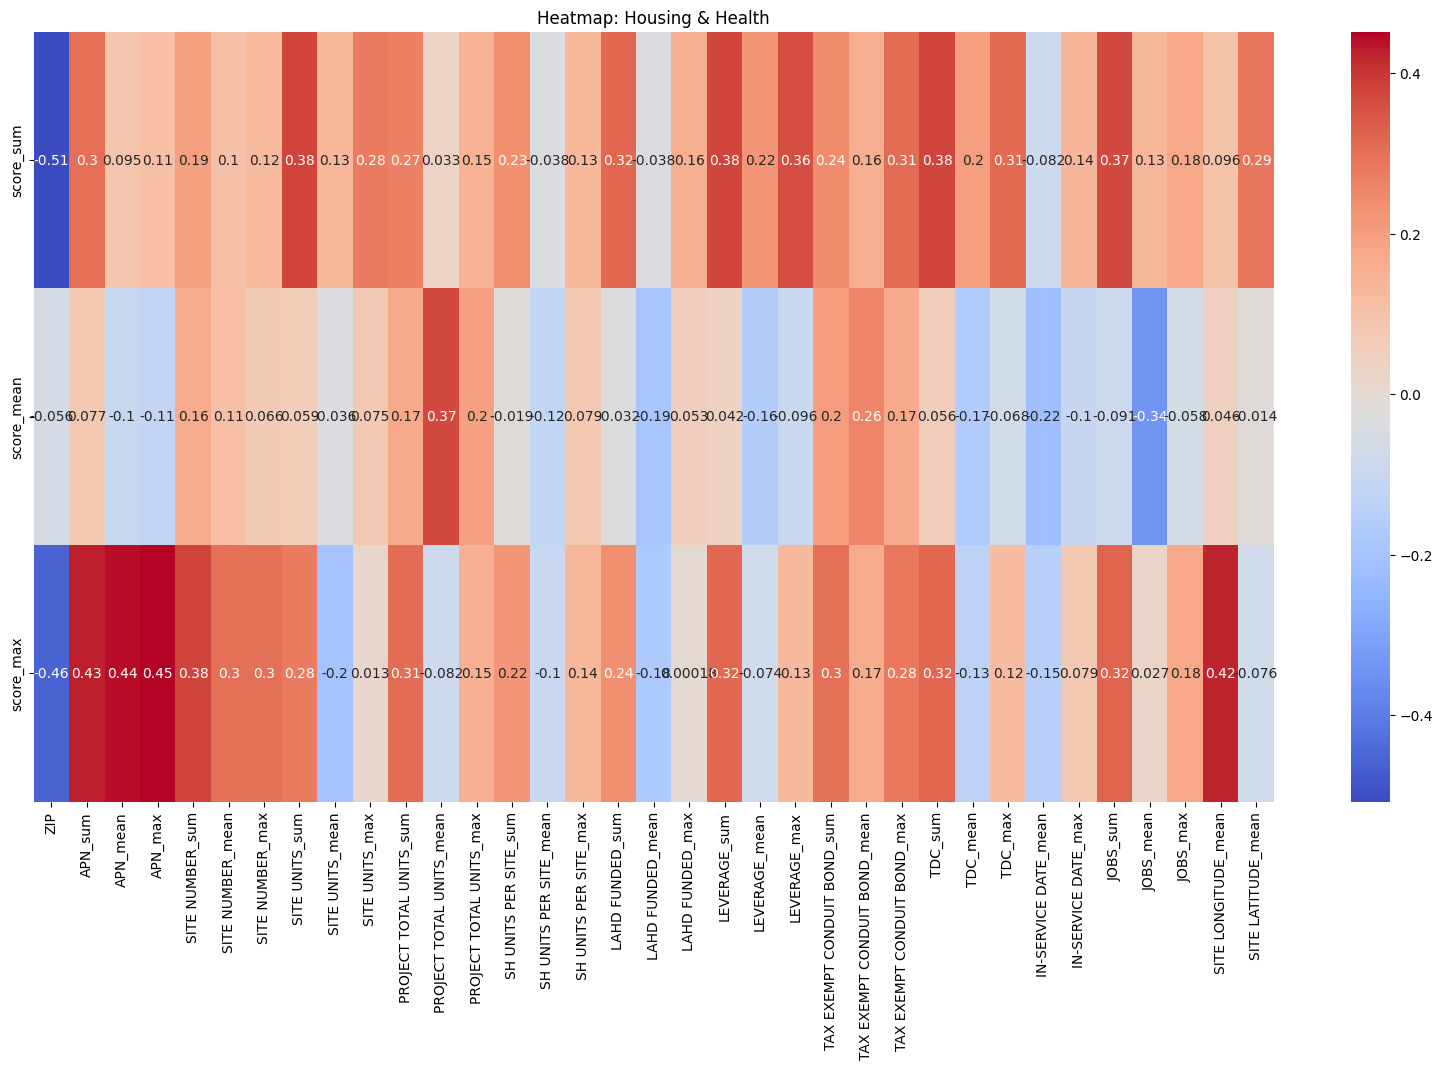

In [25]:
# Calculate the spearman correlation matrix
corr_matrix = final_df.corr('spearman')

# Extract only the relevant housing and score columns for the heatmap
# Housing columns: Everything except the last two columns
housing_columns = corr_matrix.columns[:-3]
# Score columns: The last two columns (assuming these are the score aggregates)
score_columns = corr_matrix.columns[-3:]

# Create a subset of the correlation matrix for housing vs score
corr_subset = corr_matrix.loc[score_columns, housing_columns]

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_subset, xticklabels=housing_columns, yticklabels=score_columns, annot=True, cmap='coolwarm') 

plt.title('Heatmap: Housing & Health') 
plt.show()  


We can see that `score_mean` is strongly correlated with `PROJECT TOTAL UNITS_mean`, and strongly negatively correlated with `JOBS_mean` (note that this could be an artifact of filling NaN with 0).  
We proceed to confirm this through the observation of the corresponding p-values.

Let us assume an $\alpha \lt 0.01$ 

In [26]:
ALPHA = 0.01

correlation, p_value = sp.stats.spearmanr(final_df['PROJECT TOTAL UNITS_mean'], final_df['score_mean'])
print("score_mean and PROJECT TOTAL UNITS_mean")
print(f"{correlation=}, {p_value=}")
if p_value < ALPHA:
    print("The correlation is statistically significant, reject the null hypothesis")
else:
    print("The correlation is not statistically significant, fail to reject the null hypothesis")

print()

correlation, p_value = sp.stats.spearmanr(final_df['JOBS_mean'], final_df['score_mean'])
print("score_mean and JOBS_mean")
print(f"{correlation=}, {p_value=}")
if p_value < ALPHA:
    print("The correlation is statistically significant, reject the null hypothesis")
else:
    print("The correlation is not statistically significant, fail to reject the null hypothesis")

score_mean and PROJECT TOTAL UNITS_mean
correlation=0.37010949614629046, p_value=0.006920270274931248
The correlation is statistically significant, reject the null hypothesis

score_mean and JOBS_mean
correlation=-0.3424400239050627, p_value=0.01295591898261599
The correlation is not statistically significant, fail to reject the null hypothesis


## Question 2

Let us consider the data on [Defence Production from 2016-17 to 2023-24
](https://www.data.gov.in/resource/defence-production-2016-17-2023-24)

In [27]:
defense_df = pd.read_csv('Defence_Production_22082024.csv') # Read the data csv file
display(defense_df.head()) # The first 5 rows of the data
display(defense_df.info()) # Includes info on the data types of each column

,Year,Defence Public Sector Undertakings (in Rs Cr),New Defence Public Sector Undertakings (in Rs Cr),Other Public Sector Undertakings/Joint Ventures (in Rs Cr),Defence Private Companies (in Rs Cr),Total Production (in Rs Cr)
0,2016-17,"40,427","14,825","4,698","14,104","74,054"
1,2017-18,"43,464","14,829","5,180","15,347","78,820"
2,2018-19,"45,387","12,816","5,567","17,350","81,120"
3,2019-20,"47,655","9,227","6,295","15,894","79,071"
4,2020-21,"46,711","14,635","6,029","17,268","84,643"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Year                                                        8 non-null      object
 1   Defence Public Sector Undertakings (in Rs Cr)               8 non-null      object
 2   New Defence Public Sector Undertakings (in Rs Cr)           8 non-null      object
 3   Other Public Sector Undertakings/Joint Ventures (in Rs Cr)  8 non-null      object
 4   Defence Private Companies (in Rs Cr)                        8 non-null      object
 5   Total Production (in Rs Cr)                                 8 non-null      object
dtypes: object(6)
memory usage: 516.0+ bytes


None

All but the `Year` column are integer fields, so they should be converted

In [28]:
for col in defense_df.columns[1:]:
    # Replace commas with empty strings and convert to numeric
    defense_df[col] = defense_df[col].str.replace(',', '')
    defense_df[col] = pd.to_numeric(defense_df[col], errors='coerce')
defense_df


,Year,Defence Public Sector Undertakings (in Rs Cr),New Defence Public Sector Undertakings (in Rs Cr),Other Public Sector Undertakings/Joint Ventures (in Rs Cr),Defence Private Companies (in Rs Cr),Total Production (in Rs Cr)
0,2016-17,40427,14825,4698,14104,74054
1,2017-18,43464,14829,5180,15347,78820
2,2018-19,45387,12816,5567,17350,81120
3,2019-20,47655,9227,6295,15894,79071
4,2020-21,46711,14635,6029,17268,84643
5,2021-22,55790,11913,7222,19920,94845
6,2022-23,63466,16998,7137,21083,108684
7,2023-24,73945,19662,6774,26506,126887


Let us make some plots!

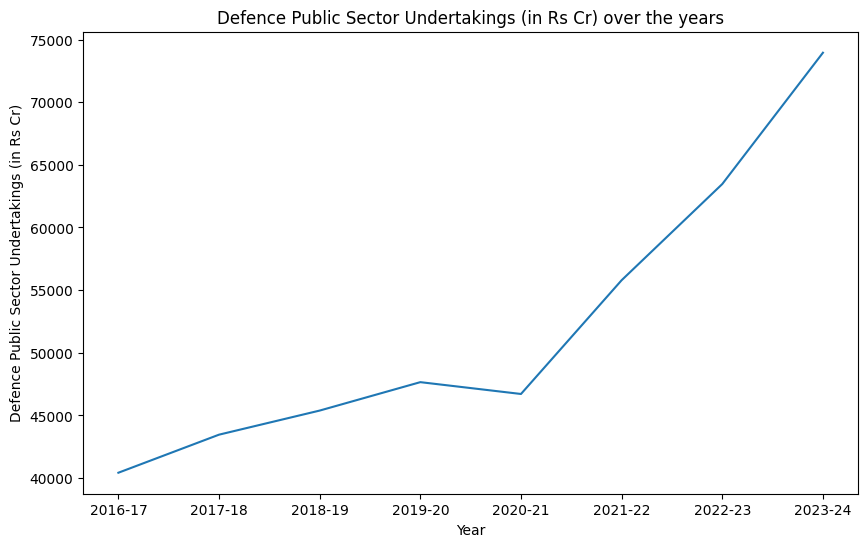

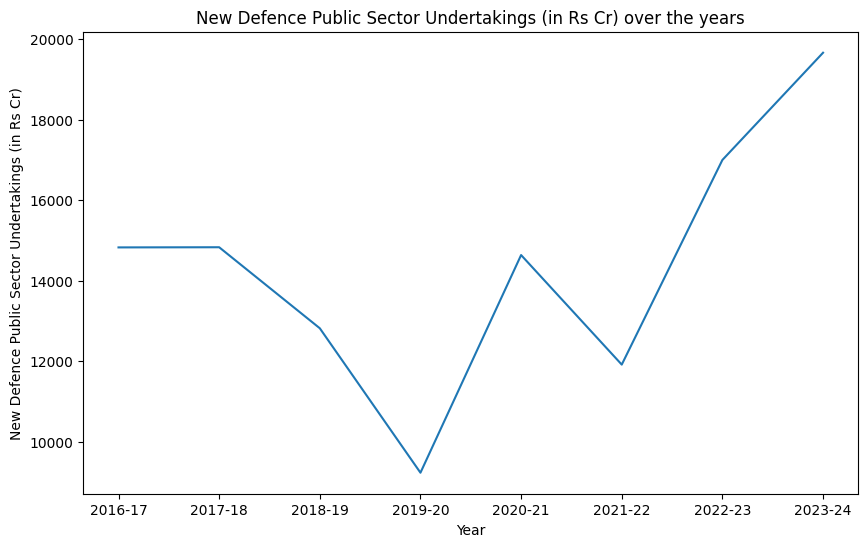

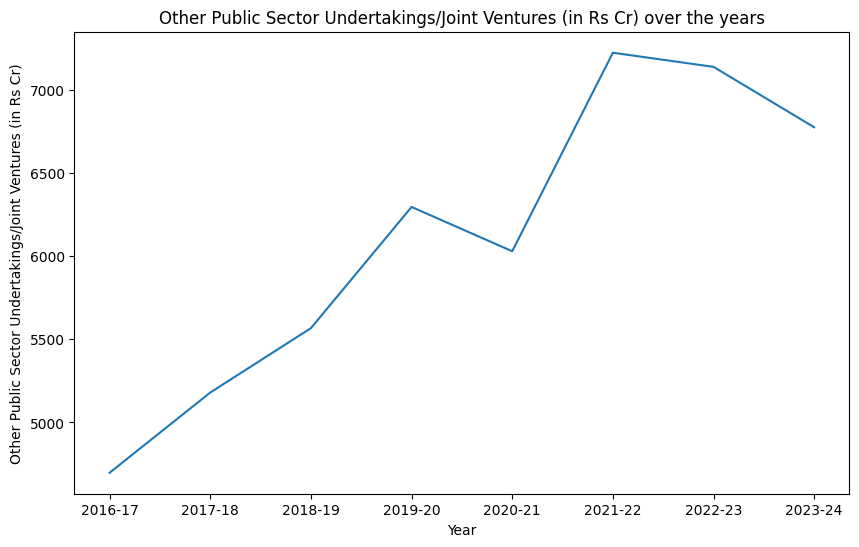

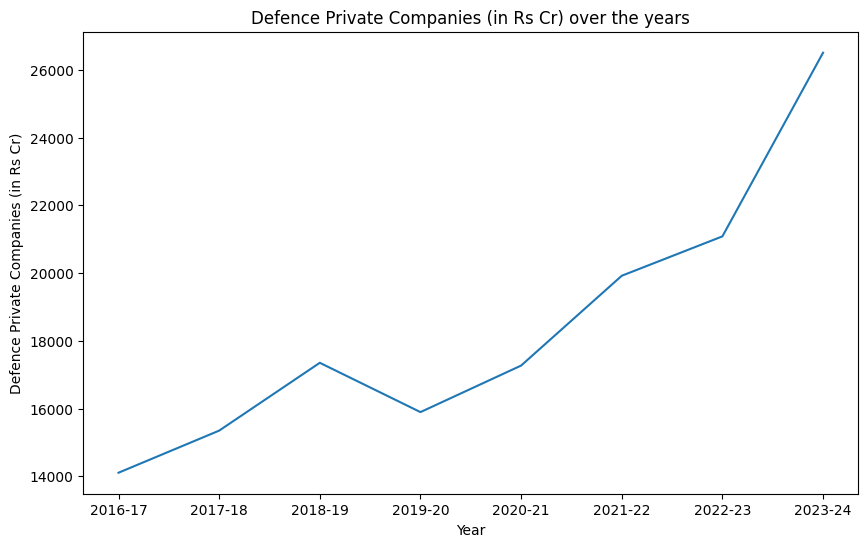

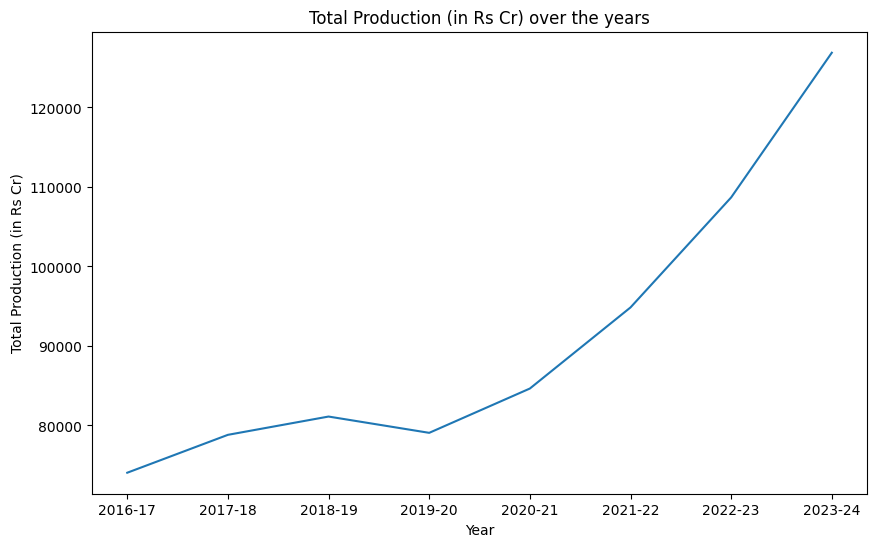

In [29]:
# Plot line plots for all columns, with year labels on x-axis
for col in defense_df.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(defense_df['Year'], defense_df[col])
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.title(f'{col} over the years')
    plt.show()

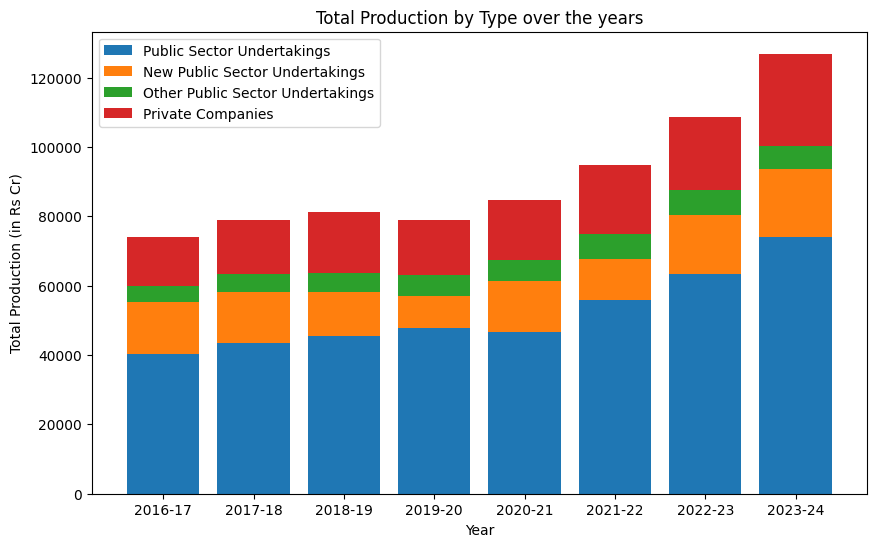

In [30]:
# Plot a bar graph, with the total production for each year split by the different types of production in the single bar [11]
plt.figure(figsize=(10, 6))
plt.bar(defense_df['Year'], defense_df['Defence Public Sector Undertakings (in Rs Cr)'], label='Public Sector Undertakings')
plt.bar(defense_df['Year'], defense_df['New Defence Public Sector Undertakings (in Rs Cr)'], label='New Public Sector Undertakings', bottom=defense_df['Defence Public Sector Undertakings (in Rs Cr)'])
plt.bar(defense_df['Year'], defense_df['Other Public Sector Undertakings/Joint Ventures (in Rs Cr)'], label='Other Public Sector Undertakings', bottom=defense_df['Defence Public Sector Undertakings (in Rs Cr)'] + defense_df['New Defence Public Sector Undertakings (in Rs Cr)'])
plt.bar(defense_df['Year'], defense_df['Defence Private Companies (in Rs Cr)'], label='Private Companies', bottom=defense_df['Defence Public Sector Undertakings (in Rs Cr)'] + defense_df['New Defence Public Sector Undertakings (in Rs Cr)'] + defense_df['Other Public Sector Undertakings/Joint Ventures (in Rs Cr)'])
plt.xlabel('Year')
plt.ylabel('Total Production (in Rs Cr)')
plt.title('Total Production by Type over the years')
plt.legend()

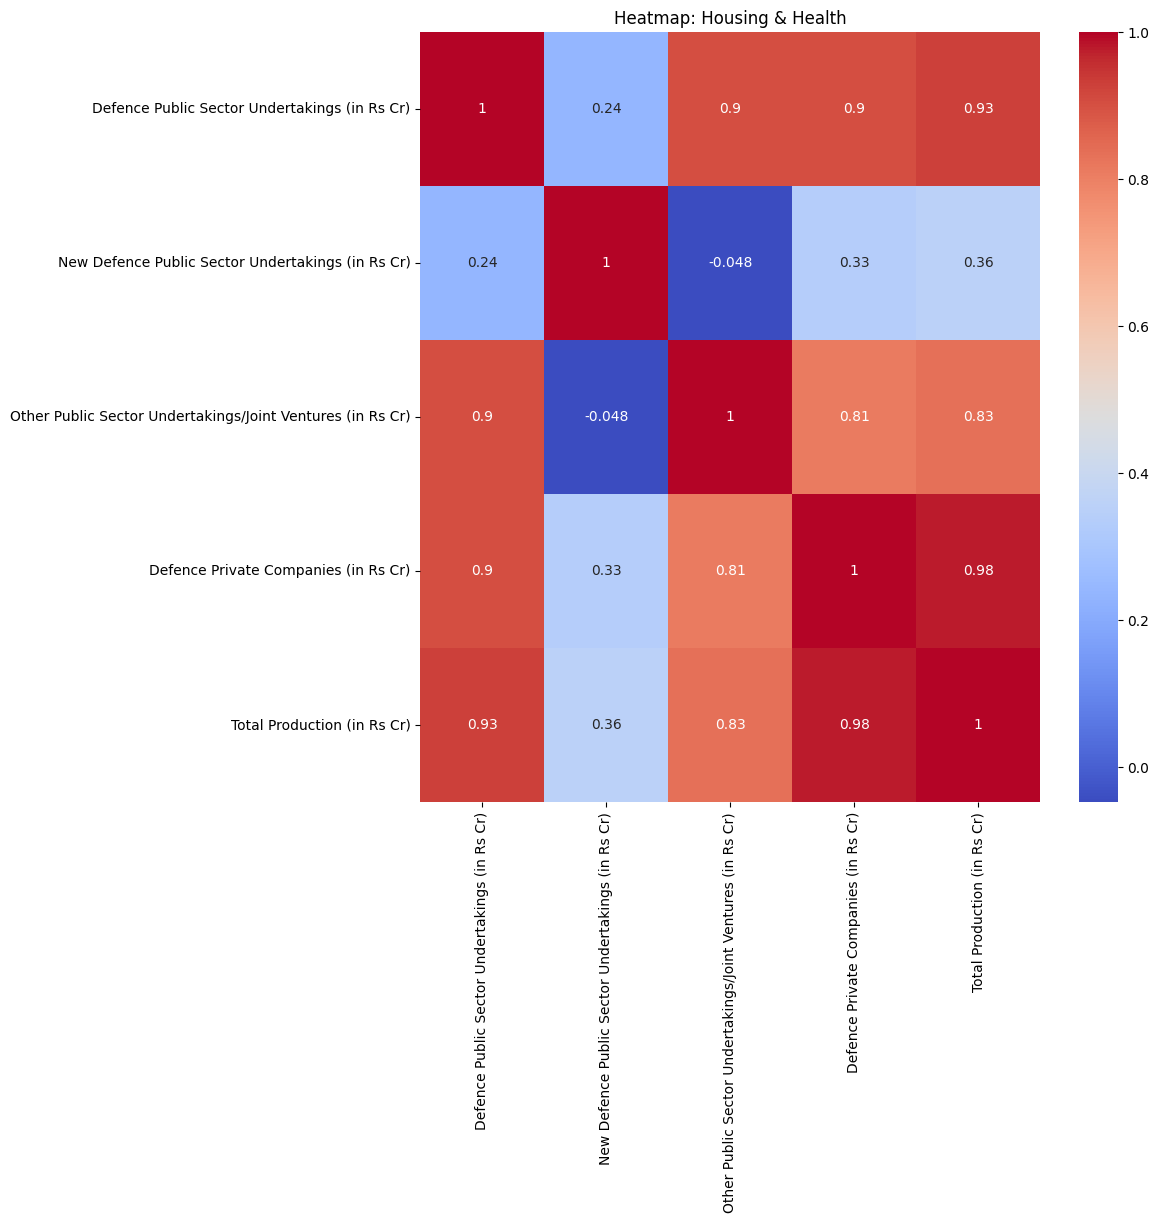

In [31]:
# Calculate the spearman correlation matrix, excluding the Year column
corr_matrix = defense_df.drop(columns='Year').corr('spearman')

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='coolwarm') 

plt.title('Heatmap: Housing & Health') 
plt.show()  

Unsuprisingly, most of the values have a similar upward trend, and seem to be heavily correlated. However, `New Defense Public Sector Undertaking` possibly due to its more varying trend seems to be less correlated.

Let us assume the hypothesis that it is in fact not correlated.

In [32]:
# Test the correlation between the columns and New Defence Public Sector Undertakings (in Rs Cr)
ALPHA = 0.01

for col in defense_df.columns[1:]:
    correlation, p_value = sp.stats.spearmanr(defense_df['New Defence Public Sector Undertakings (in Rs Cr)'], defense_df[col])
    print(f"New Defence Public Sector Undertakings (in Rs Cr) and {col}")
    print(f"{correlation=}, {p_value=}")
    if p_value < ALPHA:
        print("The correlation is statistically significant, reject the null hypothesis")
    else:
        print("The correlation is not statistically significant, fail to reject the null hypothesis")
    print()

New Defence Public Sector Undertakings (in Rs Cr) and Defence Public Sector Undertakings (in Rs Cr)
correlation=0.2380952380952381, p_value=0.5701563208157683
The correlation is not statistically significant, fail to reject the null hypothesis

New Defence Public Sector Undertakings (in Rs Cr) and New Defence Public Sector Undertakings (in Rs Cr)
correlation=1.0, p_value=0.0
The correlation is statistically significant, reject the null hypothesis

New Defence Public Sector Undertakings (in Rs Cr) and Other Public Sector Undertakings/Joint Ventures (in Rs Cr)
correlation=-0.04761904761904763, p_value=0.9108491685195836
The correlation is not statistically significant, fail to reject the null hypothesis

New Defence Public Sector Undertakings (in Rs Cr) and Defence Private Companies (in Rs Cr)
correlation=0.3333333333333334, p_value=0.4197530864197531
The correlation is not statistically significant, fail to reject the null hypothesis

New Defence Public Sector Undertakings (in Rs Cr) an

As expected, with the low number of data points, the result is inconclusive.

## Attributions
1. ChatGPT prompt  
Provide me with descriptions of why I am using the following libraries in my data analysis assignment, in Markdown:
    ```
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import scipy as sp
    import seaborn as sns
    ```
2. Taken/inspired from model submission 190020081_4.ipynb
3. Discussion with Aaditya Gupta [22B3941]
4. ChatGPT prompt:
   Can i generate the create table from my data frame. I know of to_sql
5. ChatGPT prompt:
   How do I plot pie charts?
6. ChatGPT prompt:
   Say I have a column with very few unique values, that I want to easily plot. How do I convert into the required numeric type?
7. ChatGPT prompt:
   How would I then plot these categories?
8. ChatGPT prompt:
   Summarize the two dfs that have been migrated to sql via to_sql ie aggregate (sum,mean,max,etc) grouped by the ZIP column for both, and then join over the ZIP column
9. ChatGPT prompt:
   Could you also generate the equivalent SQL query
10. ChatGPT prompt:
    Once aggregated, I am trying to see the correlation of score aggregates with housing aggregates, but I want only the score vs housing aggr part of the heatmap, not the whole square.
11. ChatGPT prompt:
    Plot a bar graph, with the total production for each year split by the different types of production in the single bar